## Deep Learning and CNN

### Extracting LBP features and Modelling

The following activities are performed as part of the LBP Features Extraction and Modelling task.

1] Loading the Preprocessed and Split Datasets


2] Extracting Local Binary Patterns (LBP) features

    2.1 Obtaining the LBP features from the training dataset

3] Modelling to Classify the Images

- Experiment 1: Building a model using SVM Classifier

        Exercise 1.1 SVM classifier with hyperparameters kernel='rbf', C=15.0

        Exercise 1.2 SVM classifier with hyperparameters kernel='rbf', C=65.0
        
- Experiment 2: Building a model using ANN Classifier

        Exercise 2.1 Keras Sequential Model with Adam optimiser

        Exercise 2.1 Keras Sequential Model with SDG Optimiser

Note: Please run/execute the Assignment1_Image_Preprocessing.ipynb notebook first to generate the dataset file math_symbol_split_datasets.npz which is utilised in this feature extraction and modelling task.

In [221]:
# Importing packages for processing
import numpy as np
import pandas as pd

# Importing packages for svm classification and matrics for evaluation
from sklearn import svm 
from sklearn import metrics

# Importing package for LBP feature extraction from skimage library
from skimage import feature 

# Importing packages to load and display the images
import cv2

# Importing packages for ANN classification
import tensorflow as tf
from tensorflow import keras
%load_ext tensorboard

# Importing package for data disualisation and displaying confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 1] Loading the Preprocessed and Split Datasets

In [222]:
# Loading the saved datasets file
math_symbol_datasets = np.load('math_symbol_split_datasets.npz')

# Accessing the datasets
X_train = math_symbol_datasets['X_train']
X_test = math_symbol_datasets['X_test']
Y_train = math_symbol_datasets['Y_train']
Y_test = math_symbol_datasets['Y_test']

# Closing the saved file after reading and loading 
math_symbol_datasets.close()

In [223]:
# Checking the shapes of training and testing datasets
print('After loading the preprocessed datasets below are their shapes:')
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

After loading the preprocessed datasets below are their shapes:
X_train shape: (3499, 45, 45)
Y_train shape: (3499,)
X_test shape: (1500, 45, 45)
Y_test shape: (1500,)


### 2] Extracting Local Binary Patterns (LBP) features

In [224]:
# Defining a class LocalBinaryPatterns for extracting LBP features from the datasets
class LocalBinaryPatterns:
	def __init__(self, numPoints, radius):
		# store the number of points and radius
		self.numPoints = numPoints
		self.radius = radius

	def LBPfeatures(self, image, eps=1e-7):
		# compute the Local Binary Pattern representation
		# of the image, and then use the LBP representation
		# to build the histogram of patterns
		lbp = feature.local_binary_pattern(image, self.numPoints, self.radius, method="uniform")
		
    # Form the histogram
		(hist, _) = np.histogram(lbp.ravel(),
			bins=np.arange(0, self.numPoints + 3),
			range=(0, self.numPoints + 2))

		# normalize the histogram
		hist = hist.astype("float")
		hist /= (hist.sum() + eps)

		# return the histogram of Local Binary Patterns
		return hist

#### 2.1 Obtaining the LBP features from the training dataset

In [225]:
# Create an object of LocalBinaryPatterns class and initial the parameters
desc = LocalBinaryPatterns(24, 8)
data_train = []
labels_train = []

# loop over the training images
for img_index in range(len(X_train)):
	# load the image, convert it to grayscale, and extract LBP features
	image = X_train[img_index].astype(np.uint8)
	hist = desc.LBPfeatures(image)

	# extract the label from the image path, then update the
	# label and data lists
	labels_train.append(Y_train[img_index])
	data_train.append(hist)

# Displaying the shape of the dataframes with LBP features extracted from train images and their labels
print("data_train:", np.shape(data_train))
print("labels_train:", np.shape(labels_train))

data_train: (3499, 26)
labels_train: (3499,)


- The above data_train output describes that each 3499 samples of the training dataset images has been transformed into a feature vector containing 26 LBP features.

- Additionally, the labels_train has 3499 labels representing the class or category corresponding to the each 3499 images. 

Thus, the training dataset has been properly processed, and both the features and labels are prepared for further use in developing the models to classify the images.

### 3] Modelling to Classify the Images

### Experiment 1: Building a model using SVM Classifier

#### Exercise 1.1 (SVM classifier with hyperparameters kernel='rbf', C=15.0)

In [226]:
# Generating a 'svm_model1' instance of SVM classifire with its hyperparameters
svm_model1 = svm.SVC(kernel='rbf', C=15.0, random_state=19)

# Training the SVM classifier model using the LBP features of the training dataset
svm_model1.fit(data_train, labels_train)

SVC(C=15.0, random_state=19)

In [227]:
# Checking the accuray on the training dataset
print("Training dataset Accuracy: {:.4f}".format(svm_model1.score(data_train, labels_train)))

Training dataset Accuracy: 0.6739


#### Obtaining the LBP features from the testing dataset

In [228]:
# Extract LBP features for each test sample and classify it with the trained SVM classifier
predictions=[]
predict_label=[]

for im_index in range(len(X_test)):
  imag = X_test[im_index].astype(np.uint8)

  # Extract LBP feature for the testing dataset
  histo = desc.LBPfeatures(imag)
  histo = histo.reshape(1, -1)

  # Perform classification on the testing dataset
  prediction = svm_model1.predict(histo)

  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(Y_test[im_index])

#### Evaluating model with the testing dataset

In [229]:
# Checking the accuracy on the testing dataset
accuracy = metrics.accuracy_score(Y_test, predictions)
print("Testing dataset Accuracy: {:.4f}".format(accuracy))

Testing dataset Accuracy: 0.6853


- A training accuracy of 67.39% suggests that the SVM model correctly classifies about 67.39% of the images in the training dataset. While, a testing accuracy of 68.53% indicates that the SVM model correctly predicts the labels of about 68.53% of the images in the testing dataset.

- The accuracies on both datasets are relatively close, indicating that the model is not overfitting or underfitting significantly. Although testing score is slightly higher than training suggesting small margin of underfitting.

- While the accuracy scores are not exceptionally high, they still demonstrate reasonable performance for the task of classifying images based on LBP features using an SVM classifier.

[[ 92  36   0   0   4   0   2   4   4  10]
 [ 25  78   0   0  14  15  20   3   0   2]
 [  0   0 139   1   0   0   0   0  12   4]
 [  2   0  23 106   0   0   0   8   2  13]
 [  3  17   0   3  53  28  17  10   0   6]
 [  0   7   0   0   4 135   7   5   0   0]
 [  0  10   0   0   2  44  43  29   0   0]
 [  3   6   0   4   3   5   7 124   7   0]
 [  1   0   6   0   0   0   0   5 131   2]
 [  3   0   4   4   2   0   0   2  12 127]]


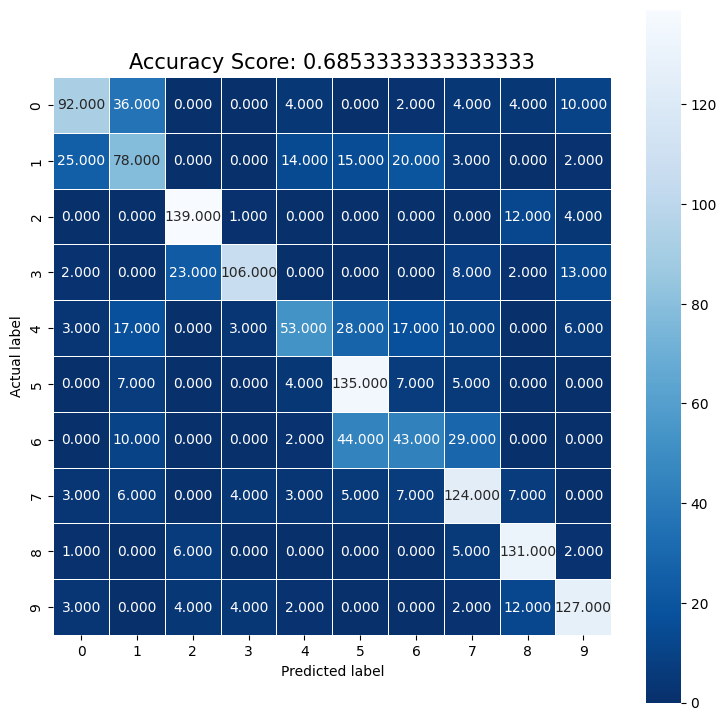

In [230]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

- The above confusion matrix provides insights into the model's performance in distinguishing between different symbols, highlighting areas where it struggles due to visual similarities or complexities in the dataset.

- Class 0, representing the symbol "pm" (plus minus), is frequently misclassified as classes 1, 9, 4, 7, 8 and 6. Specifically, it is misclassified as class 1 (leq) in 36 instances, class 9 (squared_bracket) in 10 instances, class 4 (sum), 7 (tan) and 8 (closed_bracket) in 4 instances each, and class 6 (alpha) in 2 instances. This could occur because the "pm" symbol's structure, with its horizontal line and a plus sign, may resemble the other symbols in certain orientations or visual representations.

- Furthermore, the class 6, describing "alpha" symbol, is misclassified as class 5 (theta) in 44 instances, class 7 (tan) in 29 instances and class 1 (leq) in 10 instances, may arise from the visual similarity between the Greek letters "alpha" and other symbols especially in handwritten representations where distinguishing features may not be clear.

-  Also the class 4, corresponding to "sum" symbol, is miscalssified as class 1 (leq) in 17 instances, class 5 (theta) in 28 instances, class 6 (alpha) in 17 instances, class 7 (tan) in 10 instances etc. The misclassification could result from similarities in graphical representations, particularly when the summation symbol appears as a horizontal or elongated shape similar to other symbols. 

In [231]:
# Creating the list with unique label names representing the math symbols
labelNames = ["pm", "leq", "minus", "sqrt", "sum", "theta", "alpha", "tan", "closed_bracket", "squared_bracket"]

In [232]:
# Display some classification result on test samples
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i].astype(np.uint8))
  prediction = svm_model1.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[Y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


leq


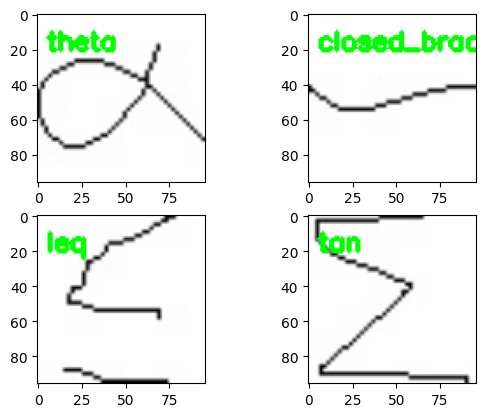

In [233]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

#### Exercise 1.2 (SVM classifier with hyperparameters kernel='rbf', C=65.0)

In [234]:
# Generating a 'svm_model2' instance of SVM classifire with its hyperparameters
svm_model2 = svm.SVC(kernel='rbf', C=65.0, random_state=19)

# Training the SVM classifier model using the LBP features of the training dataset
svm_model2.fit(data_train, labels_train)

SVC(C=65.0, random_state=19)

In [235]:
# Checking the accuracy on the training dataset
print("Training dataset Accuracy: {:.4f}".format(svm_model2.score(data_train, labels_train)))

Training dataset Accuracy: 0.7436


#### Obtaining the LBP features from the testing dataset

In [236]:
# Extract LBP features for each test sample and classify it with the trained SVM classifier
predictions=[]
predict_label=[]

for im_index in range(len(X_test)):
  imag = X_test[im_index].astype(np.uint8)

  # Extract LBP feature for the testing dataset
  histo = desc.LBPfeatures(imag)
  histo = histo.reshape(1, -1)

  # Perform classification on the testing dataset
  prediction = svm_model2.predict(histo)

  # Store the classfication result
  predictions.append(prediction)
  predict_label.append(Y_test[im_index])


#### Evaluating model on the testing dataset

In [237]:
# Checking the accuray on the testing dataset
accuracy = metrics.accuracy_score(Y_test, predictions)
print("Testing dataset Accuracy: {:.4f}".format(accuracy))

Testing dataset Accuracy: 0.7400


- The 2nd SVM model achieved an accuracy of 74.36% on the training dataset suggesting that the model was able to learn patterns and relationships present in the training data relatively well.

- The accuracy of 74.00% on the testing dataset informs how well the model will perform on new, unseen data. 

- The similar training and testing accuracies suggest that the 2nd SVM model trained on LBP features performed reasonably well without overfitting on the training data and is capable of making accurate predictions on new data. 

[[112  24   0   0   6   0   2   3   0   5]
 [ 21  83   0   0   7  11  19  13   0   3]
 [  0   0 135   8   0   0   0   0  10   3]
 [  1   0   9 125   0   0   0   5   2  12]
 [  5   8   0   2  68  23  19   6   0   6]
 [  0   6   0   0   3 134  10   5   0   0]
 [  0   5   0   0   3  35  57  28   0   0]
 [  2   5   0   5   5   2   8 130   2   0]
 [  1   0   8   1   0   0   0   3 129   3]
 [  4   0   2   4   1   0   0   0   6 137]]


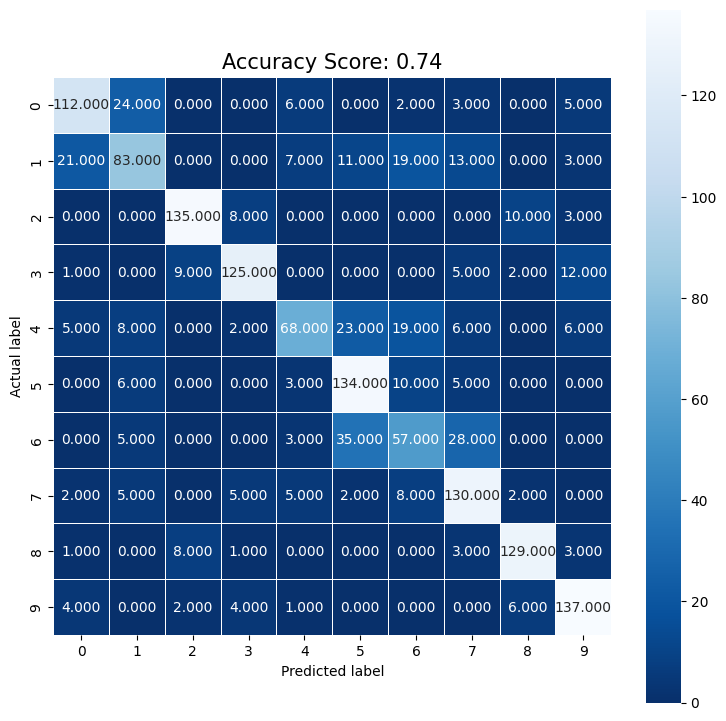

In [238]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

- The confusion matrix illustrates how well the classifier is performing for each class.

- The class 6, which represents the "alpha" symbol, is frequently misclassified as several other symbols in the dataset. Specifically, it is commonly mistaken for class 5 (theta) in 35 instances, class 7 (tan) in 28 instances, class 1 (leq) in 5 instances, and class 4 (sum) in 3 instances. These misclassifications highlight visual similarities between the "alpha" symbol and these other symbols, suggesting that the model struggles to differentiate them accurately, possibly due to shared visual features or complexities in their representations.

- Similarly, the class 0, corresponding to the "plus minus" symbol, experiences frequent misclassifications with other symbols. Notably, it is often confused with class 1 (leq) in 24 instances, class 4 (sum) in 6 instances, class 9 (squared_bracket) in 5 instances, class 7 (tan) in 3 instances, and class 6 (alpha) in 2 instances. These misclassifications indicate significant ambiguity in the visual representation of the "plus minus" symbol, suggesting that its visual features overlap with those of other symbols, making it challenging for the model to correctly classify it.

- On the other hand, classes 2, 8, and 9, corresponding to the "minus", "closed_bracket", and "squared_bracket" symbols, respectively, demonstrate minimal misclassifications compared to other classes. This suggests that these symbols exhibit relatively clearer visual distinctions from other symbols in the dataset, leading to more resonable accurate classification by the 2nd SVM model compared to the 1st SVM model. 

In [239]:
# Display some classification result on test samples
images = []

# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(Y_test)), size=(16,)):
  # classify the clothing
  histog = desc.LBPfeatures(X_test[i].astype(np.uint8))
  prediction = svm_model2.predict(histog.reshape(1, -1))
  label = labelNames[prediction[0]]
  orig_label=labelNames[Y_test[i]]
  image = X_test[i]
  color = (0, 255, 0)
  image = cv2.merge([image] * 3)
  image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
  cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
  images.append(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


leq


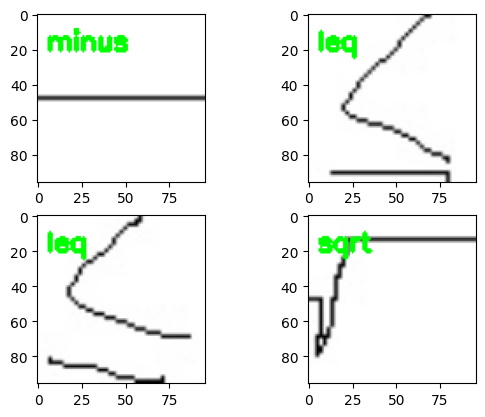

In [240]:
## Display the classification results
#Plot the image and the predicted labels
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(images[1])
print(orig_label[:])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(images[2])
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(images[3])
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(images[4])

### Experiment 2: Building a model using ANN Classifier

#### Exercise 2.1 (Keras Sequential Model with Adam optimiser)

In [241]:
# Setting random seed for TensorFlow
tf.random.set_seed(19)

# Setting random seed for NumPy (optional)
np.random.seed(19)

#### Designing a model framework

In [242]:
# Creating a ANN Sequential model with three Dense layers
ann_model1 = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(26,)),
                                         tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                         tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

#### Visualising the model

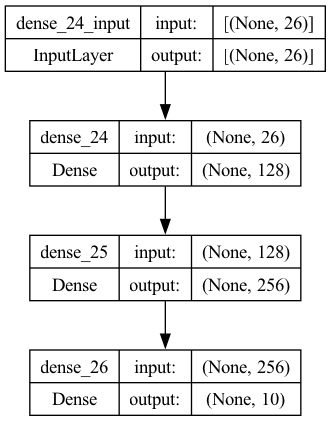

In [243]:
#Visualize Network Model
modelViz_file= 'ANN_Model1_LBP_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model1, to_file=modelViz_file, show_shapes=True)

In [244]:
# Displaying the summary of the model 
ann_model1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               3456      
                                                                 
 dense_25 (Dense)            (None, 256)               33024     
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 39,050
Trainable params: 39,050
Non-trainable params: 0
_________________________________________________________________


In [245]:
# Compiling the ANN model with Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the compiled ANN model on the training data for 10 epochs
H=ann_model1.fit(np.array(data_train), np.array(labels_train), epochs=10)

Epoch 1/10
110/110 [==============================] - 1s 3ms/step - loss: 2.0866 - accuracy: 0.2384
Epoch 2/10
110/110 [==============================] - 0s 2ms/step - loss: 1.5733 - accuracy: 0.4047
Epoch 3/10
110/110 [==============================] - 0s 1ms/step - loss: 1.4022 - accuracy: 0.4727
Epoch 4/10
110/110 [==============================] - 0s 1ms/step - loss: 1.3101 - accuracy: 0.4836
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 1.2654 - accuracy: 0.4844
Epoch 6/10
110/110 [==============================] - 0s 1ms/step - loss: 1.2339 - accuracy: 0.4999
Epoch 7/10
110/110 [==============================] - 0s 1ms/step - loss: 1.2237 - accuracy: 0.5056
Epoch 8/10
110/110 [==============================] - 0s 1ms/step - loss: 1.2043 - accuracy: 0.5059
Epoch 9/10
110/110 [==============================] - 0s 1ms/step - loss: 1.1958 - accuracy: 0.5050
Epoch 10/10
110/110 [==============================] - 0s 1ms/step - loss: 1.1869 - accuracy: 0.5121

In [246]:
# Displaying the keys helps to understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


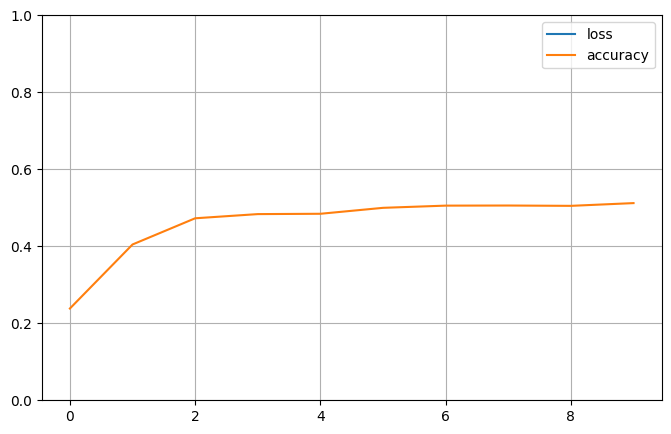

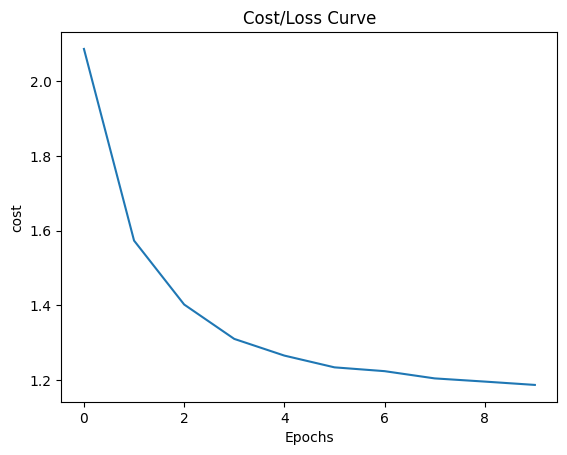

In [247]:
# Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

#### Extracting LBP features for the Testing dataset

In [248]:
# Extract LBP features for each test sample and classify it with the above trained ANN classifier
predictions = []
predict_label = []

for im_index in range(len(X_test)): 
    imag = X_test[im_index].astype(np.uint8)

    # Extract LBP feature for the testing dataset
    histo = desc.LBPfeatures(imag)

    # Perform classification
    prediction = ann_model1.predict(histo.reshape(1, -1))

    # Get the index of the class with the highest probability
    predicted_label_index = np.argmax(prediction, axis=1)[0]

    # Store the classfication result
    predictions.append(predicted_label_index)
    predict_label.append(Y_test[im_index])


1/1 [==============================] - 0s 21ms/step


In [249]:
# Checking the model's performance on test dataset
ann_model1_accuracy=metrics.accuracy_score(predict_label, predictions)
print("Testing dataset Accuracy: {:.4f}".format(ann_model1_accuracy))

Testing dataset Accuracy: 0.5327


- The training accuracy of 51.21% and testing accuracy of 53.27% indicate that the model performs moderately on both the training and testing datasets.

- With a training loss of 1.1869, it suggests that the model's predictions during training were somewhat accurate but still had significant errors on average.

- The relatively low training accuracy suggests that the model may not have learned all the underlying patterns and variations present in the training data, leading to inaccuracies in classification. 

- Thus, there is still room for improvement in the model's performance, as indicated by the moderate accuracy scores.

[[ 95  35   0   1   0   0   0   7  10   4]
 [ 42  60   0   0   0   3  27  25   0   0]
 [  0   0 130   6   0   0   0   0  19   1]
 [  2   0  18 110   0   0   0  16   2   6]
 [  6  27   0   4   5  19  37  37   0   2]
 [  2  18   0   0   5  97  35   1   0   0]
 [  4  19   0   1   4  35  37  28   0   0]
 [ 12   0   0   6  10   2   8 102   0  19]
 [  1   0   6   0   0   0   0   3 112  23]
 [  3   0  26  30   0   0   0  19  25  51]]


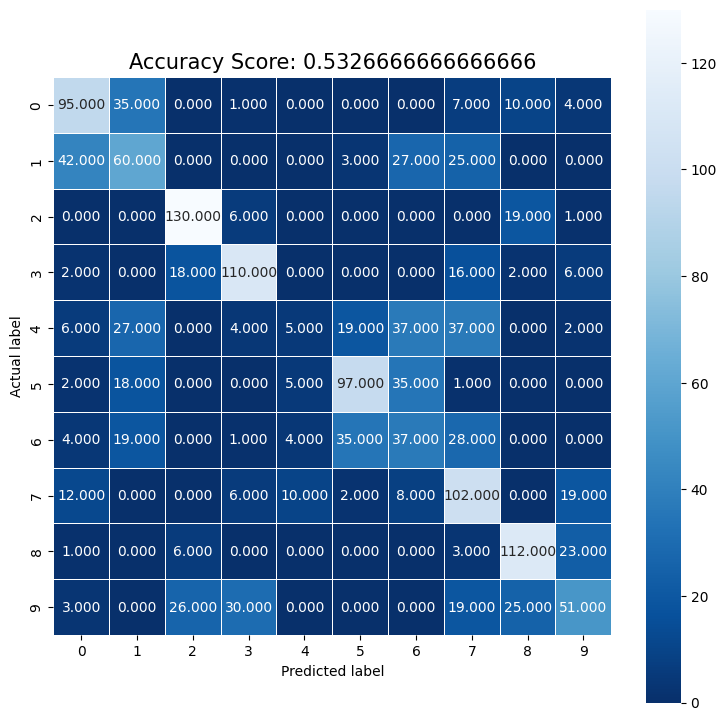

In [250]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_model1_accuracy)
plt.title(all_sample_title, size = 15);

- The class 9 representing "squared_bracket" symbol, is misclassified as class 3 (sqrt) in 30 instances, class 2 (minus) in 26 instances, class 8 (closed_bracket) in 25 instances, class 7 (alpha) in 19 instances and class 0 (pm) in 3 instances. This may be be due to certain handwriting styles of squared brackets might  resemblance to other symbols, especially when the squared brackets are elongated or vertically stretched. This visual similarity could cause confusion for the classifier, leading to misclassifications.

- The class 6 describing "alpha" symbol, is misclassified as class 5 (theta) in 35 instances, class 7 (tan) in 28 instances, class 1 (leq) in 19 instances, class 0 (pm) and class 4 (sum) each in 4 instances and class 3 (sqrt) in 1 instance. Specifically, "alpha" and "theta" symbols share certain graphical elements, such as curved lines and loops, making them difficult to differentiate for the model. Also, in some instances, the alpha symbol's graphical representation might resemble certain orientations of the tangent function symbol, particularly in handwritten symbols.

- Furthermore, the class 1 describing "leq - less than or equal" symbol, is misclassified as class 0 (pm) in 42 instances, class 6 (alpha) in 27 instances and class 7 (tan) in 25 instances. Similarities in the horizontal line structures between the less than or equal to symbol and the plus-minus symbol can lead to misclassifications. And certain graphical representations of the "alpha" and "tan" symbols might bear resemblance to certain orientations of the "less than or equal to" symbol, especially in handwritten style where distinguishing features may be less pronounced. 

- Similarly, the class 4 contributing "sum - summation" symbol, is misclassified as class 6 (alpha) and 7 (tan) each in 37 instances, class 1 (leq) in 27 instances, class 5 (theta) in 19 instances, class 0 (pm) in 6 instances, class 3 (sqrt) in 4 instances and class 9 (squared_bracket) in 2 instances. Structural similarities between the summation symbol and these other misclassified symbols, especially in certain orientations or styles, could lead to misclassifications.

- Overall, the ANN model demonstrates significant misclassification of almost all classes and there is room for improvement, particularly in reducing misclassifications and enhancing accuracy. 

#### Exercise 2.1 (Keras Sequential Model with SDG Optimiser)

In [251]:
# Creating a 2nd ANN Sequential model with three Dense layers
ann_model2 = tf.keras.models.Sequential([tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape=(26,)),
                                         tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                         tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


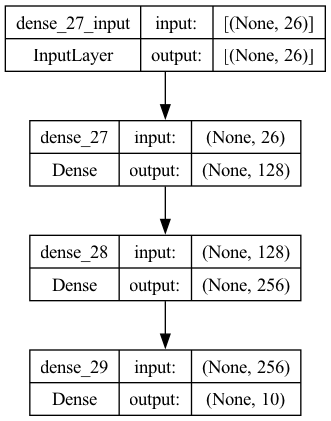

In [252]:
#Visualize Network Model
modelViz_file= 'ANN_Model2_LBP_Features.png' # Model filename

# Plot model
keras.utils.plot_model(ann_model2, to_file=modelViz_file, show_shapes=True)

In [253]:
# Displaying the summary of the model
ann_model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               3456      
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                                 
 dense_29 (Dense)            (None, 10)                2570      
                                                                 
Total params: 39,050
Trainable params: 39,050
Non-trainable params: 0
_________________________________________________________________


In [254]:
# Compiling the 2nd ANN model with SDG optimizer, sparse categorical cross-entropy loss function, and accuracy metric
ann_model2.compile(optimizer = tf.optimizers.SGD(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) ## add the required arguments

# Training the compiled ANN model on the training data for 10 epochs
H=ann_model2.fit(np.array(data_train), np.array(labels_train), epochs=10)

Epoch 1/10


110/110 [==============================] - 1s 1ms/step - loss: 2.3023 - accuracy: 0.1258
Epoch 2/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2979 - accuracy: 0.1149
Epoch 3/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2950 - accuracy: 0.1063
Epoch 4/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2924 - accuracy: 0.1069
Epoch 5/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2899 - accuracy: 0.1066
Epoch 6/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2875 - accuracy: 0.1063
Epoch 7/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2849 - accuracy: 0.1129
Epoch 8/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2821 - accuracy: 0.1172
Epoch 9/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2788 - accuracy: 0.1326
Epoch 10/10
110/110 [==============================] - 0s 1ms/step - loss: 2.2755 - accuracy: 0.1655


In [255]:
# Displaying the keys to helps understand the structure of the training history and the available metrics
type(H)
print(H.history.keys())

dict_keys(['loss', 'accuracy'])


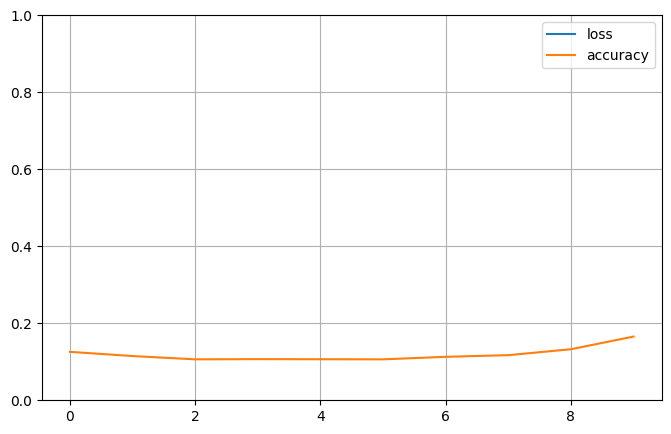

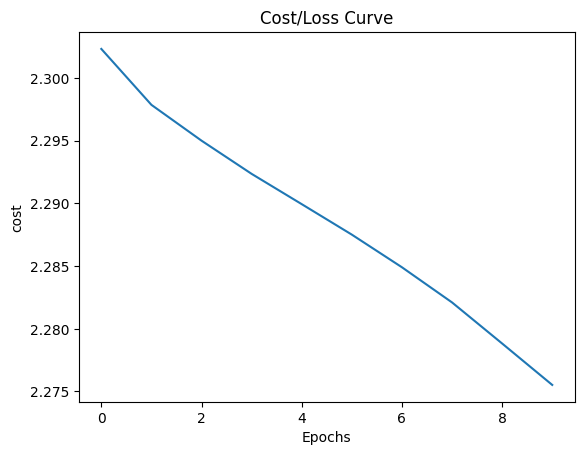

In [256]:
# Plot the learning curves
pd.DataFrame(H.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Plot only the loss train loss
plt.plot(H.history['loss'])
plt.ylabel('cost')
plt.xlabel('Epochs')
plt.title("Cost/Loss Curve")
plt.show()

#### Extracting LBP features for the Testing dataset

In [257]:
# Extract LBP features for each test sample and classify it with the above trained ANN classifier
predictions = []
predict_label = []

for im_index in range(len(X_test)): 
    imag = X_test[im_index].astype(np.uint8)

    # Extract LBP feature for the testing dataset
    histo = desc.LBPfeatures(imag)

    # Perform classification
    prediction = ann_model2.predict(histo.reshape(1, -1))

    # Get the index of the class with the highest probability
    predicted_label_index = np.argmax(prediction, axis=1)[0]

    # Store the classfication result
    predictions.append(predicted_label_index)
    predict_label.append(Y_test[im_index])

1/1 [==============================] - 0s 21ms/step


In [258]:
# Checking the model's performance on test dataset
ann_model2_accuracy=metrics.accuracy_score(predict_label, predictions)
print("Testing dataset Accuracy: {:.4f}".format(ann_model2_accuracy))

Testing dataset Accuracy: 0.1193


- The low training accuracy of 16.55% and testing accuracy of 11.93% indicate that the model performs very poorly on both the training and testing datasets.

- Additionally, the high training loss of 2.2755 suggests that the model's predictions during training were highly inaccurate, with significant errors.

- Therefore, the poor performance on both training and testing datasets indicates that the model has not effectively learned the underlying patterns and variations present in the data, leading to inaccurate classifications.

[[  0   0   0   0   0   0 152   0   0   0]
 [  0   0   0   0   0   0 157   0   0   0]
 [  0   0   0  94   0   0  59   0   3   0]
 [  0   0   0  51   0   0 101   0   2   0]
 [  0   0   0   2   0   0 135   0   0   0]
 [  0   0   0   0   0   0 158   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0 159   0   0   0]
 [  0   0   0   1   0   0 144   0   0   0]
 [  0   0   0  16   0   0 135   0   3   0]]


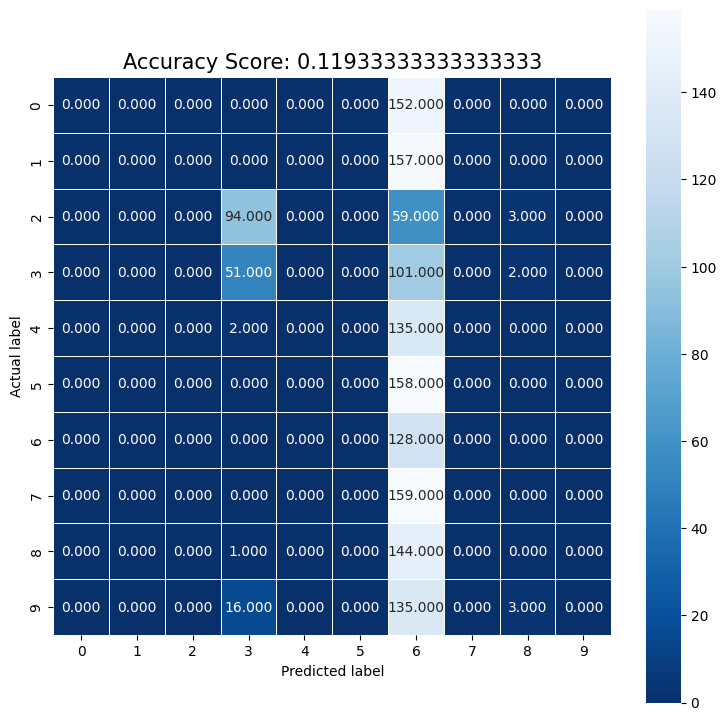

In [259]:
# Plot the confusion matrix
cm  = metrics.confusion_matrix(Y_test, predictions)
print(cm)

# Plot confusion matrix using seaborn library
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(ann_model2_accuracy)
plt.title(all_sample_title, size = 15);

- Also this confusion matrix for the testing dataset demonstrates the ANN model with LBP features extraction performed inadequately in accurately classifying the math symbols. 

- The high number of misclassifications across all classes suggests that the model struggled signigicantly which might be due to limitations in the discriminatory power of LBP features for capturing the subtle differences between symbols and SDG optimizer of this 2nd ANN model. 